# 1-D Linear Convection

### 1-D linear convection model and initial conditions

The 1-D linear convection model is shown below.
$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

With initial conditions being understood to be a wave, the equation shows the propagation of the initial wave with speed $c$, without any change to the shape of the wave. We will let the initial condition be $u(x,0)=u_0(x)$. The exact solution of the equation will then be $u(x,t)=u_0(x-ct)$.

### Discretizing the equation

The equation is then discretized in both time and space. 

Utilizing the forward difference scheme for the time derivative: 

$$\frac{\partial u}{\partial t}\approx \frac{u(t+\Delta t)-u(t)}{\Delta t} = \frac{u_i^{n+1}-u_i^n}{\Delta t}$$

The superscripts will denote the time steps and the subscripts will denote the points along the grid space. Likewise, the space derivative is discretized using a 2nd order central difference scheme:

$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x} = \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x}$$

The discrete equation will therefore be:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_{i+1}^n - u_{i-1}^n}{2 \Delta x} = 0 $$

Because we know the initial conditions, the only unknown in this discretization is $u_i^{n+1}$. We can solve for this unknown to get an equation that allows us to advance in time:

$$u_i^{n+1} = u_i^n - c \frac{\Delta t}{2 \Delta x}(u_{i+1}^n-u_{i-1}^n)$$

### Import necessary libraries and utilities

In [2]:
import numpy as np              #load numpy
from matplotlib import pyplot   #load matplotlib
import time, sys                #Load some utilities to measure time

#matplotlib plots will appear in the notebook not as a separate window
%matplotlib inline

### Create the meshgrid and define variables

The spatial domain will be of length 2. The variable `nx` will be the number of equally-spaced grid points across the length that will create the meshgrid. The variable `dx` will be the distance between any pair of adjacent grid points.

We will calculate 50 timesteps at a $\Delta t = 0.025$ secs.

In [3]:
nx = 41   #number of grid points
dx = 2 / (nx-1)
nt = 50    #number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers
c = 1      #assume wavespeed of c = 1

### Set up initial conditions

We also need to set up our initial conditions. The initial velocity $u_0$ is given as 
$u = 2$ in the interval $0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

Here, we use the function `ones()` defining a `numpy` array which is `nx` elements long with every value equal to 1.

In [4]:
u = np.ones(nx)      #numpy function ones()
#setting u = 2 between 0.5 and 1
u[int(.5 / dx):int(1 / dx + 1)] = 2
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Input wave function

Now let's visualize our input wave function.

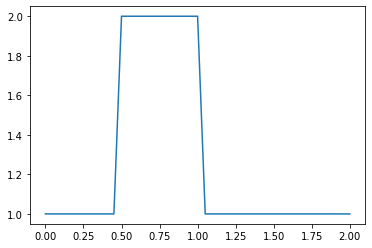

In [6]:
pyplot.plot(numpy.linspace(0, 2, nx), u);

### Implement the discretization of the convection equation

The equation will have to be performed on every element in the array `u`. The result of the operation will be stored in a temporary array `un`, which will be the solution $u$ for the next time-step. Then this will be repeated for all the required time steps.

We will first initialize the temporary array `un` to hold the values we calculate for the $n+1$ timestep, using the numpy ones() function.

Then we will use a nested loop to calculate for the change in space and time.

In [6]:
un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #it will run nt times
    un = u.copy()    ##copy the existing values of u into un
    for i in range(1, nx-1): 
        u[i] = un[i] - c * dt / (2 * dx) * (un[i+1] - un[i-1])

### Results after advancing in time

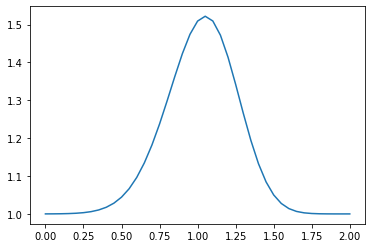

In [10]:
pyplot.plot(numpy.linspace(0, 2, nx), u);